In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer # for handling missing variables either categorical or numerical
from sklearn.preprocessing import OneHotEncoder # for one hot encoding categorical variables
from sklearn.metrics import mean_absolute_error # for Mean absolute error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [2]:
train = pd.read_csv(r'C:\Users\Sudhakor Das\Downloads\titanic\train.csv')
test = pd.read_csv(r'C:\Users\Sudhakor Das\Downloads\titanic\test.csv')

In [3]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [5]:
train_m = train.loc[(train.Embarked == 'nan')]
per_sur = train_m.loc[(train_m.Survived ==  1)]

In [6]:

per_sur

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
#Combinning the two train and test data combuinbe
combine = [train, test]

In [8]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
# information about data
train.dtypes
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
#Categorize the featurs according to the vlaue they have. 
#In the above DataFrame we are seeing three types of features.
#Numerical:Age,SibSp,Parch,pasengerId,Fare.
#Categorical:Survived,Pclass,Sex,Embarked.
#Mixed:Ticket,Cabin(Alphanumeruic and Numeric)

In [11]:
train.dtypes
#test.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_m = train[(train.Sex == 'male')].sum()

In [14]:
train.describe(include= 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ostby, Mr. Engelhart Cornelius",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [15]:
#Analyzing the corelations of categorical features with3  the Survived columns 
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train[["Sex", "Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
#Make Observations and Decisions
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=True)

,Parch,Survived
4,4,0.000000
6,6,0.000000
5,5,0.200000
0,0,0.343658
2,2,0.500000
1,1,0.550847
3,3,0.600000


In [19]:
#Let's have the corelation of numerical features

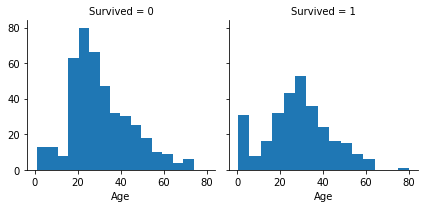

In [20]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=15)

In [21]:
#Here we wre seeing that 
#Age range betwwen 15-35  has high death rate
#Age range betwwen 20-38  has high death rate


C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


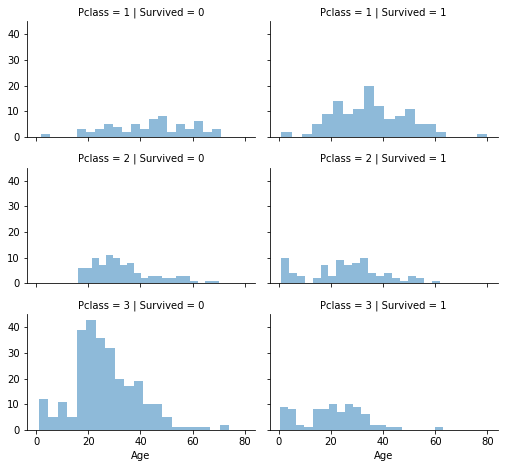

In [22]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


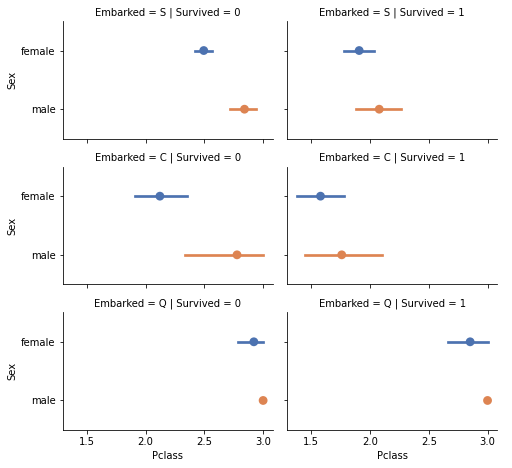

In [23]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train, row='Embarked',col = 'Survived' ,size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass',  'Sex', palette='deep')
grid.add_legend()

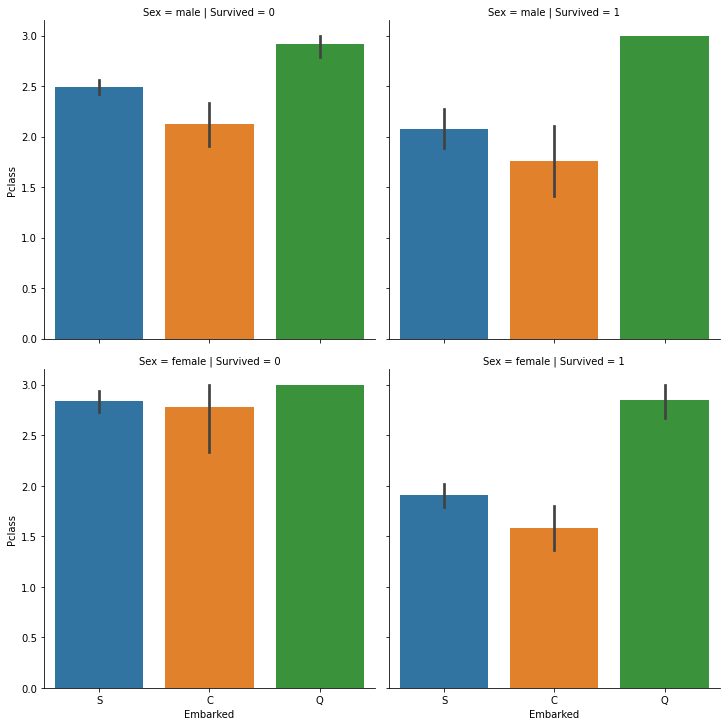

In [24]:
sns.catplot(y = 'Pclass',  x = 'Embarked', kind = 'bar',col = 'Survived',row = 'Sex' ,data = train)

C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


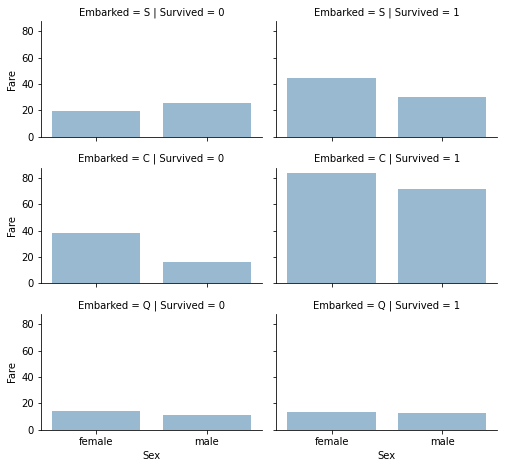

In [25]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Data Cleaning

In [26]:


train_df = train.drop(['Ticket', 'Cabin'], axis=1)
test_df = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

In [27]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [28]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean() 


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [30]:
#Now safely delete the Name Name from both of the dataset only PassengerId from the train Dateset.
train_df = train_df.drop(['Name','PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine =[train_df,test_df]

In [31]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [32]:
 train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
    

In [33]:
train_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

In [34]:
#Earlier we seen that catagory of age has a great impact on the Survival .So let's make some Age group
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,1.0,1,0,7.2500,S,1
1,1,1,female,2.0,1,0,71.2833,C,3
2,1,3,female,1.0,0,0,7.9250,S,2
3,1,1,female,2.0,1,0,53.1000,S,3
4,0,3,male,2.0,0,0,8.0500,S,1


In [36]:
for dataset in combine:
     dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
     dataset.loc[dataset['FamilySize'] > 1, 'FamilySize'] = 1
     dataset.loc[dataset['FamilySize'] < 0, 'FamilySize'] = 0


In [37]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,male,2.0,0,0,7.8292,Q,1,0
1,893,3,female,2.0,1,0,7.0000,S,3,1
2,894,2,male,3.0,0,0,9.6875,Q,1,0
3,895,3,male,1.0,0,0,8.6625,S,1,0
4,896,3,female,1.0,1,1,12.2875,S,3,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S,1,0
414,1306,1,female,2.0,0,0,108.9000,C,5,0
415,1307,3,male,2.0,0,0,7.2500,S,1,0
416,1308,3,male,NaN,0,0,8.0500,S,1,0


In [38]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]



In [39]:
for dataset in combine:    
    X = dataset.loc[ dataset['Embarked'] == 'S']
    print(X)

     Survived  Pclass     Sex  Age     Fare Embarked  Title  FamilySize
0           0       3    male  1.0   7.2500        S      1           1
2           1       3  female  1.0   7.9250        S      2           0
3           1       1  female  2.0  53.1000        S      3           1
4           0       3    male  2.0   8.0500        S      1           0
6           0       1    male  3.0  51.8625        S      1           0
..        ...     ...     ...  ...      ...      ...    ...         ...
883         0       2    male  1.0  10.5000        S      1           0
884         0       3    male  1.0   7.0500        S      1           0
886         0       2    male  1.0  13.0000        S      5           0
887         1       1  female  1.0  30.0000        S      2           0
888         0       3  female  1.0  23.4500        S      2           1

[644 rows x 8 columns]
     PassengerId  Pclass     Sex  Age     Fare Embarked  Title  FamilySize
1            893       3  female  2.0

In [40]:
train_df['FareBand'] = pd.cut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean()

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [41]:
test_df.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
FamilySize      0
dtype: int64

In [42]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
   
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,male,1.0,0.0,S,1,1
1,1,1,female,2.0,3.0,C,3,1
2,1,3,female,1.0,1.0,S,2,0
3,1,1,female,2.0,3.0,S,3,1
4,0,3,male,2.0,1.0,S,1,0
5,0,3,male,1.0,1.0,Q,1,0
6,0,1,male,3.0,3.0,S,1,0
7,0,3,male,0.0,2.0,S,4,1
8,1,3,female,1.0,1.0,S,3,1
9,1,2,female,0.0,2.0,C,3,1


In [43]:
 train_df['Embarked'] = train_df['Embarked'].fillna('S')
    

In [44]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    dataset['Sex'] = dataset['Sex'].map( {'male': 0, 'female': 1} ).astype(int)


In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,0,1,1
1,1,1,1,2.0,3.0,1,3,1
2,1,3,1,1.0,1.0,0,2,0
3,1,1,1,2.0,3.0,0,3,1
4,0,3,0,2.0,1.0,0,1,0


In [46]:
X = train_df.iloc[:,1:8]
y = train_df.Survived
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,1,1
1,1,1,2.0,3.0,1,3,1
2,3,1,1.0,1.0,0,2,0
3,1,1,2.0,3.0,0,3,1
4,3,0,2.0,1.0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)


In [49]:
X_train = StandardScaler().fit_transform(X_train)
#Y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(X_test)

In [50]:
rm = RandomForestClassifier()
rm.fit(X_train,y_train)
rm.score(X_test,y_test)

0.7864406779661017

In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

77.97

In [52]:
import xgboost as xgb

In [53]:
train = xgb.DMatrix(X_train, label = y_train)
test = xgb.DMatrix(X_test, label = y_test)

In [54]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [55]:
model = XGBClassifier(max_depth = 2,
                     n_estimators = 100,
                     learning_rate = .05,
                     min_child_weight = 1,
                     random_state = 45,
                     reg_alpha = 0
                     )

           
x = model.fit(X_train,y_train)
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.7898305084745763

In [56]:
Pid = test_df['PassengerId']
pred = model.predict(test_df.drop(['PassengerId'],axis = 1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : Pid, 'Survived': pred })
output.to_csv('submissio.csv', index=False)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6'] ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize']
expected f1, f4, f6, f0, f2, f5, f3 in input data
training data did not have the following fields: Embarked, Title, Sex, FamilySize, Fare, Pclass, Age

In [57]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
clf =  GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv = 5, return_train_score = False)

clf.fit(X_train,y_train)
clf.cv_results_

{'mean_fit_time': array([0.04341593, 0.00499601, 0.01119242, 0.01119218, 0.0127914 ,
        0.0179883 ]),
 'std_fit_time': array([0.06144977, 0.00063211, 0.00097936, 0.00193815, 0.00074795,
        0.00316069]),
 'mean_score_time': array([0.00299845, 0.00140004, 0.00159945, 0.00100026, 0.00179958,
        0.00119996]),
 'std_score_time': array([1.54828089e-03, 4.89648320e-04, 4.89706784e-04, 4.90933902e-07,
        3.99947206e-04, 3.99589624e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [58]:

clf = RandomizedSearchCV(svm.SVC(gamma= 'auto'), {
          'C' : [1,10,25],
          'kernel':['rbf','linear']
    
},cv = 5,
       return_train_score = False, 
       n_iter = 2)

clf.fit(X_train,y_train)

pd.DataFrame(clf.cv_results_)[['param_C','param_kernel','mean_test_score']]


,param_C,param_kernel,mean_test_score
0,10,linear,0.801933
1,1,linear,0.801933


# Parameter grid:

In [59]:
model_params = {
    'svm': {
        'model' : svm.SVC(gamma = 'auto'),
        'params' : {
            'C' : [1,10,20,12,15],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             "max_depth": [3, 5, 7, 9, 11, 13],
         }
    },
    'logisticregression': {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,6,10],
            'penalty': ['l1', 'l2']
        }
    },
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [3, 5, 7, 9, 11, 13],
        }
    }
    
}

In [60]:
model_scores = []

for model_name ,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], cv = 5,return_train_score = False)
    clf.fit(X_train,y_train)
    
    model_scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
        
    })

C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Sudhakor Das\.conda\envs\tf36\lib\site-packages\sklearn\model_selection\_validation.

In [61]:
df = pd.DataFrame(model_scores)
df

,model,best_score,best_params
0,svm,0.828796,"{'C': 20, 'kernel': 'rbf'}"
1,random-forest,0.842241,"{'max_depth': 11, 'n_estimators': 25}"
2,logisticregression,0.805308,"{'C': 1, 'penalty': 'l2'}"
3,decision_tree,0.820406,{'max_depth': 9}
